In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import np_utils

import tensorflow as tf
import keras
from tensorflow_core.keras import Model
from tensorflow_core.python.keras.layers import Input, Dense, GRU, LSTM, Dropout
from tensorflow_core.keras import optimizers
from tensorflow_core.keras.models import load_model

Using TensorFlow backend.


In [29]:
data = pd.read_csv('tslang.csv')
data.head()

,filename,seq1,seq2,seq3,seq4,seq5,seq6,seq7,seq8,seq9,...,seq79,seq80,seq81,seq82,seq83,seq84,seq85,seq86,seq87,label
0,common_voice_tr_17341269.mp3,-28.671259,-28.671259,-28.671259,-28.594355,-23.302088,-21.683058,-22.529316,-20.512342,-19.944502,...,-8.218327,-7.162225,-7.152306,-7.921572,-8.872492,-10.029106,-8.932535,-8.830759,-8.814616,Turkish
1,common_voice_tr_17341270.mp3,-18.675406,-12.775420,-10.191453,-9.995229,-9.822378,-10.787068,-11.464541,-11.791995,-12.880933,...,-5.941443,-5.437989,-4.313529,-3.594510,-4.578447,-4.841236,-6.277249,-7.314360,-6.984949,Turkish
2,common_voice_tr_17341271.mp3,-29.168598,-28.445410,-25.697535,-21.021667,-18.727261,-19.127209,-20.424198,-18.682182,-16.259388,...,-6.501460,-4.253098,-3.483280,-3.627386,-5.621589,-7.772541,-10.608480,-10.832165,-9.111898,Turkish
3,common_voice_tr_17341278.mp3,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-34.657932,-32.157036,...,-35.465096,-34.565926,-34.064175,-25.434107,-18.991602,-16.503279,-16.020468,-17.432213,-17.578808,Turkish
4,common_voice_tr_17341279.mp3,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,...,-21.736340,-19.915949,-13.989322,-12.898703,-16.812244,-17.894398,-15.678299,-14.883287,-15.698987,Turkish


In [30]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,seq1,seq2,seq3,seq4,seq5,seq6,seq7,seq8,seq9,seq10,...,seq79,seq80,seq81,seq82,seq83,seq84,seq85,seq86,seq87,label
0,-28.671259,-28.671259,-28.671259,-28.594355,-23.302088,-21.683058,-22.529316,-20.512342,-19.944502,-19.473763,...,-8.218327,-7.162225,-7.152306,-7.921572,-8.872492,-10.029106,-8.932535,-8.830759,-8.814616,Turkish
1,-18.675406,-12.775420,-10.191453,-9.995229,-9.822378,-10.787068,-11.464541,-11.791995,-12.880933,-12.484132,...,-5.941443,-5.437989,-4.313529,-3.594510,-4.578447,-4.841236,-6.277249,-7.314360,-6.984949,Turkish
2,-29.168598,-28.445410,-25.697535,-21.021667,-18.727261,-19.127209,-20.424198,-18.682182,-16.259388,-15.557657,...,-6.501460,-4.253098,-3.483280,-3.627386,-5.621589,-7.772541,-10.608480,-10.832165,-9.111898,Turkish
3,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-35.198715,-34.657932,-32.157036,-28.223465,...,-35.465096,-34.565926,-34.064175,-25.434107,-18.991602,-16.503279,-16.020468,-17.432213,-17.578808,Turkish
4,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,-32.834057,...,-21.736340,-19.915949,-13.989322,-12.898703,-16.812244,-17.894398,-15.678299,-14.883287,-15.698987,Turkish


In [31]:
language_list = data.iloc[:, -1]
language_list

0        Turkish
1        Turkish
2        Turkish
3        Turkish
4        Turkish
          ...   
14995    Persian
14996    Persian
14997    Persian
14998    Persian
14999    Persian
Name: label, Length: 15000, dtype: object

In [32]:
encoder = LabelEncoder()
y = encoder.fit_transform(language_list)
print(y)

[4 4 4 ... 2 2 2]


In [33]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [34]:
print(dummy_y)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

In [37]:
X_train.shape

(12000, 87)

In [43]:
X_test = X_test.reshape(3000,87,1)
X_train = X_train.reshape(12000,87,1)


In [40]:
X_train.shape

(12000, 1, 87)

In [41]:
DROPOUT = 0.3
RECURRENT_DROP_OUT = 0.2
optimizer = optimizers.Adam(decay=1e-4)
main_input = Input(shape=(1,87), name='main_input')
layer1 = LSTM(64, return_sequences=True, name='layer1')(main_input)
layer2 = LSTM(32, return_sequences=True, name='layer2')(layer1)
layer3 = Dense(100, activation='tanh', name='layer3')(layer2)
rnn_output = Dense(5, activation='softmax', name='rnn_output')(layer3)

model = Model(inputs=main_input, outputs=rnn_output)
print('\nCompiling model...')
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), shuffle=True, verbose=1)



Compiling model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 1, 87)]           0         
_________________________________________________________________
layer1 (LSTM)                (None, 1, 64)             38912     
_________________________________________________________________
layer2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
layer3 (Dense)               (None, 1, 100)            3300      
_________________________________________________________________
rnn_output (Dense)           (None, 1, 5)              505       
Total params: 55,133
Trainable params: 55,133
Non-trainable params: 0
_________________________________________________________________
Train on 12000 samples, validate on 3000 samples
Epoch 1/50
12000/12000 [==============================

Epoch 46/50
12000/12000 [==============================] - 6s 525us/sample - loss: 0.7003 - acc: 0.7371 - val_loss: 1.4521 - val_acc: 0.5383
Epoch 47/50
12000/12000 [==============================] - 4s 345us/sample - loss: 0.6919 - acc: 0.7409 - val_loss: 1.4696 - val_acc: 0.5293
Epoch 48/50
12000/12000 [==============================] - 6s 488us/sample - loss: 0.6876 - acc: 0.7438 - val_loss: 1.4935 - val_acc: 0.5293
Epoch 49/50
12000/12000 [==============================] - 6s 519us/sample - loss: 0.6814 - acc: 0.7483 - val_loss: 1.4964 - val_acc: 0.5383
Epoch 50/50
12000/12000 [==============================] - 6s 517us/sample - loss: 0.6780 - acc: 0.7486 - val_loss: 1.5011 - val_acc: 0.5280


In [44]:
from keras import models
from keras import layers
model2 = models.Sequential()
model2.add(layers.LSTM(64, return_sequences=True,input_shape=(87,1)))
model2.add(layers.Dropout(0.2))
model2.add(layers.LSTM(32, return_sequences=True))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
model2.summary()
history = model2.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), shuffle=True, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 87, 64)            16896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 87, 64)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 87, 32)            12416     
_________________________________________________________________
dropout_14 (Dropout)         (None, 87, 32)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 87, 100)           3300      
_________________________________________________________________
dropout_15 (Dropout)         (None, 87, 100)           0         
_________________________________________________________________
dense_10 (Dense)             (None, 87, 5)            

ValueError: Error when checking target: expected dense_10 to have shape (87, 5) but got array with shape (1, 5)

In [28]:
from keras import models
from keras import layers
model2 = models.Sequential()
model2.add(layers.Dense(256, shape=(X_train.shape[1],)))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()
history = model2.fit(X_train, y_train,epochs=100,)
        

TypeError: ('Keyword argument not understood:', 'shape')

In [52]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('LSTM.model')

Saved model to disk


INFO:tensorflow:Assets written to: LSTM.model\assets


In [121]:
data = pd.read_csv('5langtest.csv')
data.head()
data = data.drop(['filename'],axis=1)
data.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,-326.365692,118.729942,0.666729,37.966267,8.479445,4.692266,-6.881396,-5.850728,-0.029433,-6.596133,...,0.346014,-5.936338,1.468385,-3.361923,-4.326117,-5.977447,0.464422,-7.558537,-2.305692,Turkish
1,-383.620148,112.471321,-3.116855,22.167076,-2.245688,2.442477,-3.634593,-5.498386,-3.254369,-7.458304,...,1.662149,-2.193036,-0.745241,-1.492682,-1.252945,-4.289709,-0.683882,-2.956189,-2.925009,Turkish
2,-362.079498,90.656273,-3.940087,24.174574,0.522142,5.686224,-4.541938,-3.048762,-1.666469,-5.033555,...,2.743518,-4.978319,0.326358,-0.071845,-3.650645,-4.583994,1.003159,-5.715622,-1.828743,Turkish
3,-397.155029,90.325745,3.057629,19.175505,1.570266,3.305055,-1.215333,-0.148660,-0.315445,-6.866125,...,5.052822,-2.335471,2.034746,-3.216006,-3.529693,-1.087466,0.672866,-4.361683,-1.362758,Turkish
4,-395.014313,121.667747,9.815867,23.712048,10.952191,-0.237414,-1.660510,-3.591281,-4.365257,-8.810498,...,0.549620,-5.497268,-1.179936,-1.567438,-7.719094,-3.438961,-2.345177,-7.053899,-1.770096,Turkish


In [152]:
language_list = data.iloc[:, -1]
language_list
encoder = LabelEncoder()
y_new = encoder.fit_transform(language_list)
encoder = LabelEncoder()
encoder.fit(y_new)
encoded_Y = encoder.transform(y_new)
print(y_new[380])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_new = np_utils.to_categorical(encoded_Y)
print(dummy_y_new)
dummy_y_new.shape

0
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


(1875, 5)

In [155]:
scaler = StandardScaler()
X_new = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [156]:
testX = X.reshape(15000,1,20)
testY = dummy_y.reshape(15000,1,5)

In [157]:
X_new = X_new.reshape(1875,1,20)
dummy_y_new = dummy_y_new.reshape(1875,1,5)

In [158]:
loss, acc = model2.evaluate(X_new, dummy_y_new)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

1875/1875 [==============================] - 0s 38us/step
loss: 2.14
acc: 0.37


In [169]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model3 = Sequential()
model3.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(20, 1)))
model3.add(TimeDistributed(Dense(5, activation='sigmoid')))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 20, 40)            3520      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 5)             205       
Total params: 3,725
Trainable params: 3,725
Non-trainable params: 0
_________________________________________________________________


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


KeyError: 'val_accuracy'

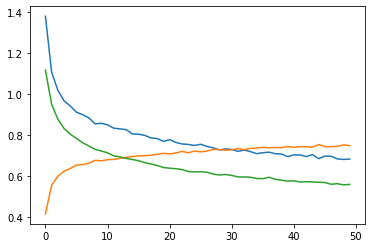

In [183]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')